In [4]:
# importing the required liberaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading the CSV file and getting info
df = pd.read_csv('Spotify most streamed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [6]:
# getting the columns that contains missing values
missing_values = df.columns[df.isna().sum() > 0]
missing_values

Index(['Daily'], dtype='object')

In [7]:
# dropping the missing values we drops them because they are only 3 values
df.dropna(subset=missing_values, inplace=True)


In [8]:
# Replaceing data from object to int
df['Daily'] = df['Daily'].str.replace(',','')
df['Daily'] = pd.to_numeric(df['Daily'])
df['Streams'] = df['Streams'].str.replace(',','')
df['Streams'] = pd.to_numeric(df['Streams'])


In [9]:
# drop the duplicated values 
df.drop_duplicates(subset='Artist and Title', inplace=True)
duplicated_values = df.duplicated(subset='Artist and Title', keep=False)
df[duplicated_values].sort_values(by='Artist and Title')

,Artist and Title,Streams,Daily


In [10]:
# split the Artist and Title to Title and Artist
df['Artist'] = df['Artist and Title'].apply(lambda x : x.split(' - ')[0])
df['Title'] = df['Artist and Title'].apply(lambda x : x.split(' - ')[1])


Text(0.5, 1.0, 'the top 10 songs')

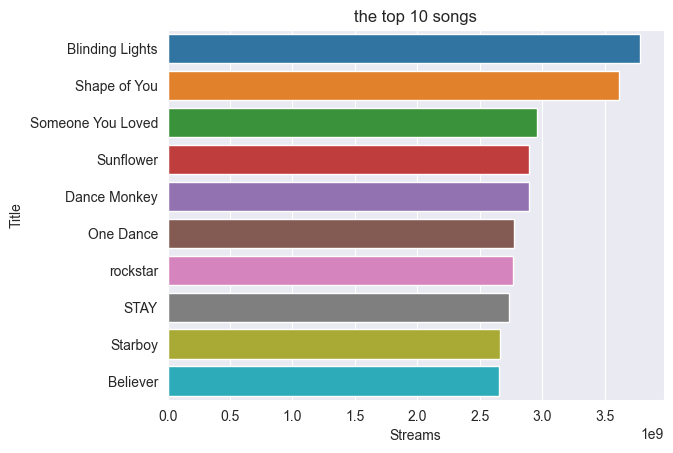

In [11]:
# getting the top ten and visualize it as a bar graph
the_top_10 = df.sort_values(by='Streams', ascending=False).head(10)
sns.set_style('darkgrid')
ax = sns.barplot(data=the_top_10, y='Title', x='Streams', hue='Title')
plt.title('the top 10 songs')

Text(0.5, 0, 'the number of songs')

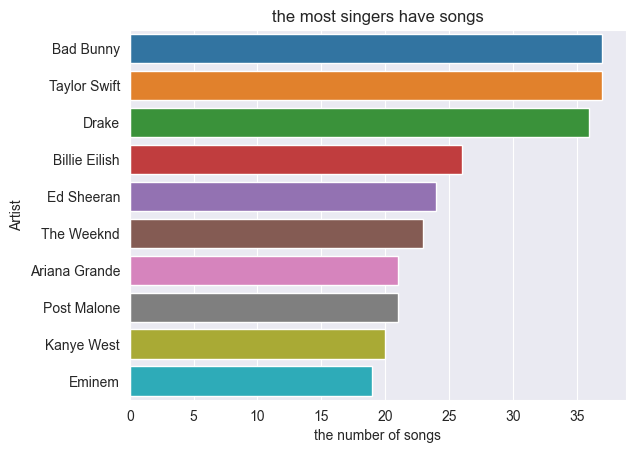

In [12]:
# getting the top singers have songs
singers = df['Artist'].value_counts().reset_index()
sns.barplot(data=singers.head(10), y='Artist', x='count', hue='Artist')
plt.title('the most singers have songs')
plt.xlabel('the number of songs')

<Axes: >

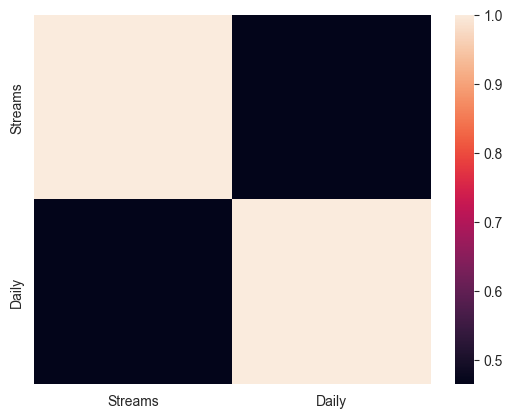

In [13]:
# show the correlation between the numeric values 
numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_data.corr()
sns.heatmap(correlations)
# there is a week correlation between Streams and Daily